In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\crop_yield.csv")

In [7]:
# CHECKING THE DATASETS - 
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [8]:
df.shape

(19689, 10)

In [9]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [10]:
# CHECKING THE INFORMATION OF DATASET -
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [16]:
# RENAMING COLUMNS TO MAKE IT CLEAN AND VISIBLE -
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

In [17]:
# CHECKING THE MISSING VALUES -
df.isnull().sum()

crop               0
crop_year          0
season             0
state              0
area               0
production         0
annual_rainfall    0
fertilizer         0
pesticide          0
yield              0
dtype: int64

In [18]:
# CHECKING DUPLICATE VALUES -
df.duplicated().sum()

np.int64(0)

In [19]:
# REMOVING THE DUPLICATE VALUES IF EXISTS -
df = df.drop_duplicates()

In [23]:
# FIXING NUMERIC COLUMNS -
numeric_cols = ["crop_year", "area", "production", "yield"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [24]:
# RECHECKING THE VALUES - 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   crop             19689 non-null  object 
 1   crop_year        19689 non-null  int64  
 2   season           19689 non-null  object 
 3   state            19689 non-null  object 
 4   area             19689 non-null  float64
 5   production       19689 non-null  int64  
 6   annual_rainfall  19689 non-null  float64
 7   fertilizer       19689 non-null  float64
 8   pesticide        19689 non-null  float64
 9   yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [25]:
# DROP INVALID ROWS -
df = df.dropna(subset=["area", "production"])

In [26]:
# REMOVE ZERO AND NEGATIVE VALUES -
df = df[(df["area"] > 0) & (df["production"] > 0)]

In [27]:
# RECALCULATING YIELD - 
df["calculated_yield"] = df["production"] / df["area"]

In [28]:
df[["yield", "calculated_yield"]].describe()

,yield,calculated_yield
count,19577.000000,19577.000000
mean,80.411344,84.320436
std,880.794259,926.213576
min,0.000000,0.002330
25%,0.604348,0.600000
50%,1.037273,1.041667
75%,2.410000,2.481207
max,21105.000000,21105.000000


In [29]:
df["yield"] = df["calculated_yield"]
df = df.drop(columns=["calculated_yield"])

In [30]:
df = df[df["yield"] > 0]

In [31]:
# HANDLING EXTREME OUTLIERS -
upper_limit = df["yield"].quantile(0.99)
df = df[df["yield"] <= upper_limit]

In [32]:
df["yield"].describe()

count    19381.000000
mean         4.267764
std         11.206321
min          0.002330
25%          0.598540
50%          1.031766
75%          2.395976
max        106.475094
Name: yield, dtype: float64

In [33]:
# CLEANING CATEGORICAL TERMS -
df[["crop", "state", "season"]].nunique()

crop      55
state     30
season     6
dtype: int64

In [34]:
cat_cols = ["crop", "state", "season"]

for col in cat_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.lower()
    )

In [35]:
df["season"].value_counts()

season
kharif        8169
rabi          5732
whole year    3485
summer        1193
autumn         413
winter         389
Name: count, dtype: int64

In [36]:
season_map = {
    "kharif": "kharif",
    "rabi": "rabi",
    "summer": "summer",
    "whole year": "annual",
    "autumn": "kharif",
    "winter": "rabi"
}

df["season"] = df["season"].map(season_map)

In [37]:
df["season"].value_counts()

season
kharif    8582
rabi      6121
annual    3485
summer    1193
Name: count, dtype: int64

In [38]:
df["crop"] = df["crop"].str.title()
df["state"] = df["state"].str.title()
df["season"] = df["season"].str.title()

In [39]:
df[["crop", "state", "season"]].nunique()

crop      55
state     30
season     4
dtype: int64

In [40]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 19381 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   crop             19381 non-null  object 
 1   crop_year        19381 non-null  int64  
 2   season           19381 non-null  object 
 3   state            19381 non-null  object 
 4   area             19381 non-null  float64
 5   production       19381 non-null  int64  
 6   annual_rainfall  19381 non-null  float64
 7   fertilizer       19381 non-null  float64
 8   pesticide        19381 non-null  float64
 9   yield            19381 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


crop               0
crop_year          0
season             0
state              0
area               0
production         0
annual_rainfall    0
fertilizer         0
pesticide          0
yield              0
dtype: int64

In [41]:
df.to_csv("crop_yield_cleaned.csv", index=False)

EXPLORATORY DATA ANALYSIS -

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

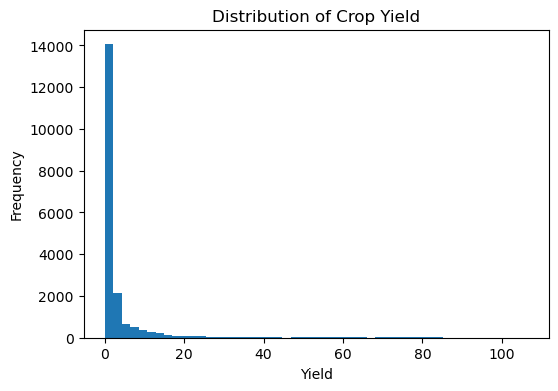

In [43]:
# YIELD DISTRIBUTION -
plt.figure(figsize=(6,4))
plt.hist(df["yield"], bins=50)
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yield")
plt.show()

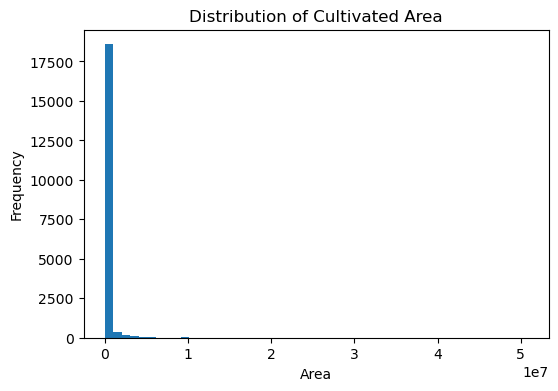

In [44]:
# AREA DISTRIBUTION -
plt.figure(figsize=(6,4))
plt.hist(df["area"], bins=50)
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.title("Distribution of Cultivated Area")
plt.show()

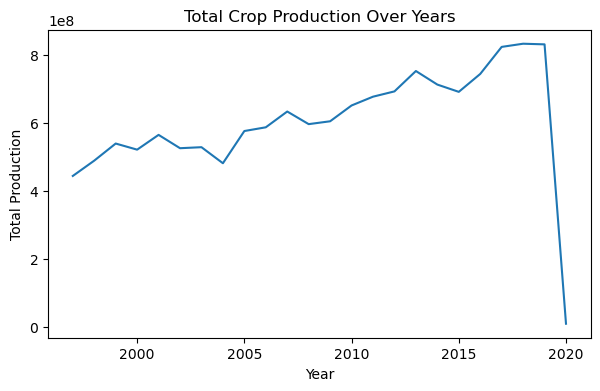

In [45]:
# PRODUCTION TREND OVER THE YEARS -
yearly_production = (
    df.groupby("crop_year")["production"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(7,4))
plt.plot(yearly_production["crop_year"], yearly_production["production"])
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Total Crop Production Over Years")
plt.show()

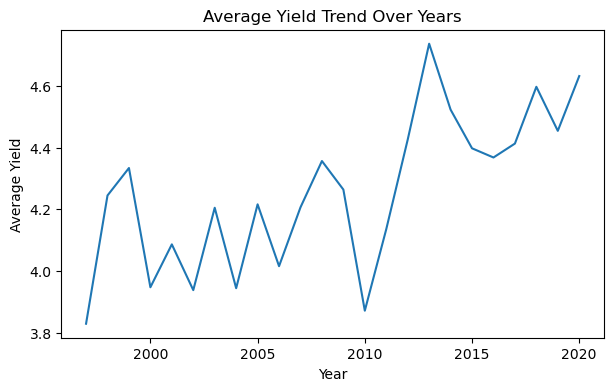

In [46]:
# YIELD TREND OVER THE YEARS -
yearly_yield = (
    df.groupby("crop_year")["yield"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(7,4))
plt.plot(yearly_yield["crop_year"], yearly_yield["yield"])
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.title("Average Yield Trend Over Years")
plt.show()

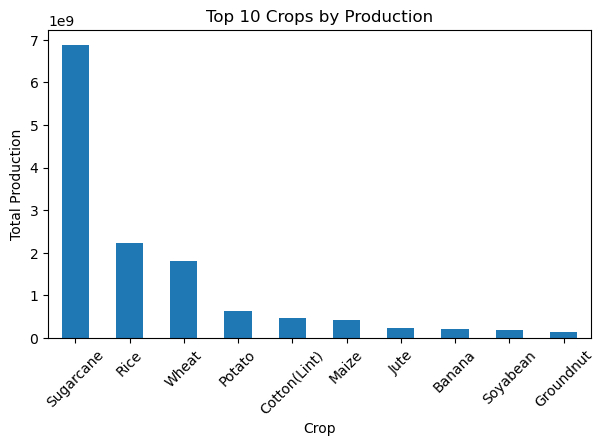

In [47]:
#TOP 10 CROPS BY PRODUCTION -
top_crops = (
    df.groupby("crop")["production"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(7,4))
top_crops.plot(kind="bar")
plt.xlabel("Crop")
plt.ylabel("Total Production")
plt.title("Top 10 Crops by Production")
plt.xticks(rotation=45)
plt.show()

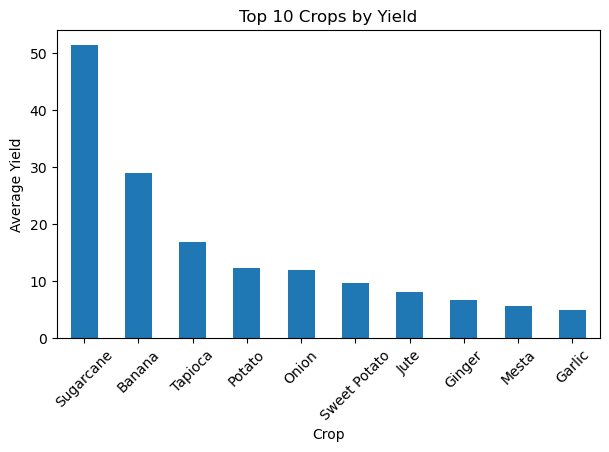

In [48]:
# TOP 10 CROPS BY YIELD -
top_yield_crops = (
    df.groupby("crop")["yield"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(7,4))
top_yield_crops.plot(kind="bar")
plt.xlabel("Crop")
plt.ylabel("Average Yield")
plt.title("Top 10 Crops by Yield")
plt.xticks(rotation=45)
plt.show()

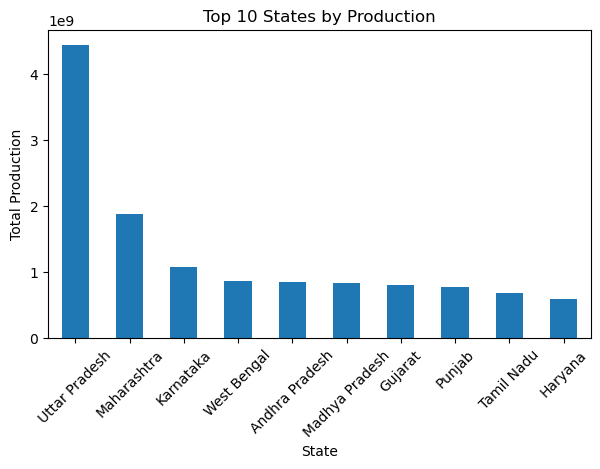

In [49]:
# STATE-WISE PRODUCTION ANALYSIS -
state_production = (
    df.groupby("state")["production"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(7,4))
state_production.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Total Production")
plt.title("Top 10 States by Production")
plt.xticks(rotation=45)
plt.show()

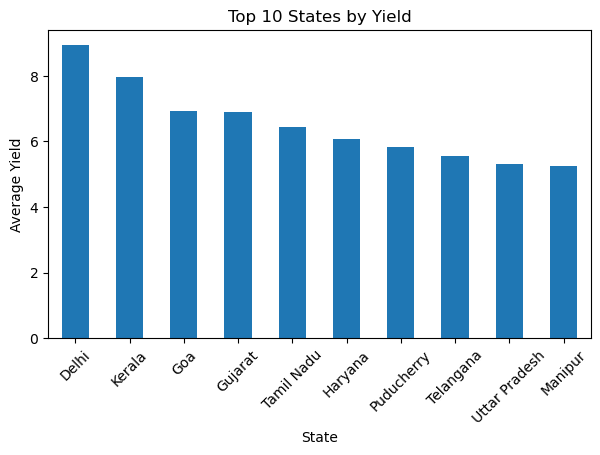

In [50]:
# STATE-WISE AVERAGE YIELD -
state_yield = (
    df.groupby("state")["yield"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(7,4))
state_yield.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Average Yield")
plt.title("Top 10 States by Yield")
plt.xticks(rotation=45)
plt.show()

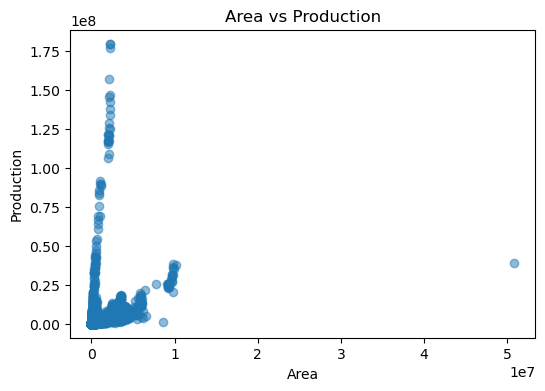

In [51]:
# AREA VS PRODUCTION -
plt.figure(figsize=(6,4))
plt.scatter(df["area"], df["production"], alpha=0.5)
plt.xlabel("Area")
plt.ylabel("Production")
plt.title("Area vs Production")
plt.show()

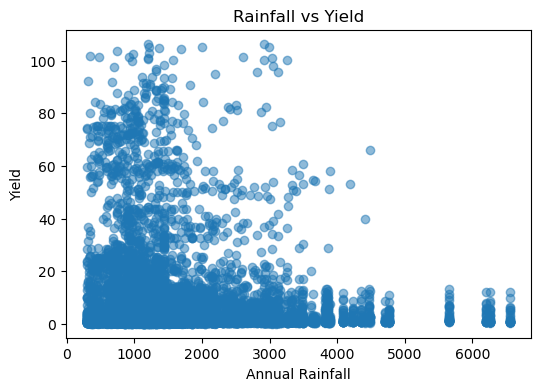

In [52]:
# RAINFALL VS YIELD -
plt.figure(figsize=(6,4))
plt.scatter(df["annual_rainfall"], df["yield"], alpha=0.5)
plt.xlabel("Annual Rainfall")
plt.ylabel("Yield")
plt.title("Rainfall vs Yield")
plt.show()

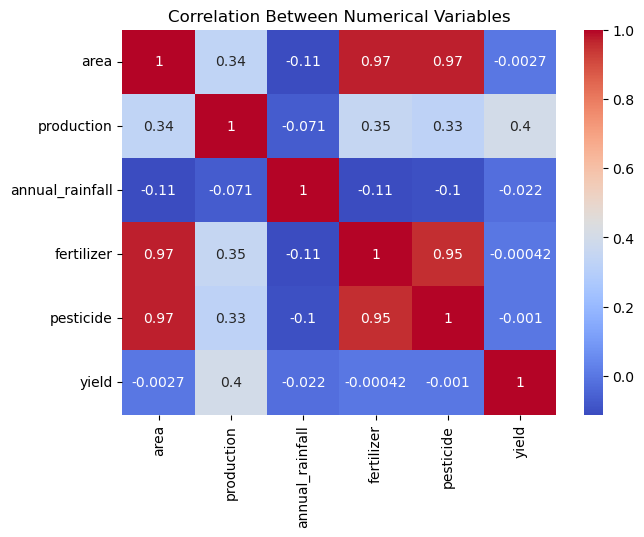

In [54]:
3 # CORRELATION HEATMAP -
plt.figure(figsize=(7,5))
sns.heatmap(
    df[["area", "production", "annual_rainfall", "fertilizer", "pesticide", "yield"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Numerical Variables")
plt.show()

SUMMARY -
1. Production has increased over time, driven mainly by expansion in cultivated area.
2. Yield varies significantly across crops and states.
3. High production crops are not always high-yield crops
4. Rainfall and fertilizer show moderate influence on yield.
5. Area has strong correlation with production but not with yield.

In [55]:
df.to_csv("crop_yield_cleaned.csv", index=False)